In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [2]:
pd.set_option('display.float_format',lambda x:f"{x:,.2f}")
sns.set_context('notebook', font_scale=0.9)
plt.style.use(['ggplot'])

In [3]:
city_df = pd.read_csv('City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month - City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [4]:
city_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1/31/2000,2/29/2000,...,12/31/2021,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"253,690.00","255,517.00",...,"741,586.00","745,686.00","750,578.00","756,734.00","762,321.00","768,797.00","773,944.00","777,692.00","779,960.00","781,622.00"
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"234,181.00","234,401.00",...,"924,019.00","928,991.00","937,936.00","953,874.00","973,168.00","990,391.00","992,337.00","992,630.00","978,196.00","966,595.00"
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,"109,068.00","109,079.00",...,"245,783.00","248,718.00","252,080.00","256,435.00","261,101.00","265,558.00","268,901.00","271,059.00","272,400.00","272,639.00"
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,"166,139.00","166,536.00",...,"302,821.00","305,104.00","306,404.00","308,303.00","309,649.00","312,487.00","314,663.00","315,910.00","315,587.00","315,429.00"
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,"114,794.00","114,975.00",...,"269,323.00","274,032.00","278,464.00","284,127.00","289,739.00","294,776.00","297,727.00","298,796.00","299,124.00","298,951.00"


In [5]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 9/30/2022
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


In [6]:
city_df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '1/31/2000', '2/29/2000',
       ...
       '12/31/2021', '1/31/2022', '2/28/2022', '3/31/2022', '4/30/2022',
       '5/31/2022', '6/30/2022', '7/31/2022', '8/31/2022', '9/30/2022'],
      dtype='object', length=281)

# Convert Datetime into one Column

In [7]:
id_vars = city_df.columns[:8]
id_vars

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'],
      dtype='object')

In [8]:
long_city = pd.melt(city_df, id_vars=id_vars, var_name='Date', value_name='Price')
long_city

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Price
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,1/31/2000,"253,690.00"
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,1/31/2000,"234,181.00"
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,1/31/2000,"109,068.00"
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,1/31/2000,"166,139.00"
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,1/31/2000,"114,794.00"
...,...,...,...,...,...,...,...,...,...,...
6133486,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,9/30/2022,"192,110.00"
6133487,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,9/30/2022,"264,685.00"
6133488,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,9/30/2022,"142,438.00"
6133489,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,9/30/2022,"266,255.00"


# Converting datetime Column into datetime type

In [9]:
long_city['Date'] = pd.to_datetime(long_city['Date'], format="%m/%d/%Y")
long_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6133491 entries, 0 to 6133490
Data columns (total 10 columns):
 #   Column      Dtype         
---  ------      -----         
 0   RegionID    int64         
 1   SizeRank    int64         
 2   RegionName  object        
 3   RegionType  object        
 4   StateName   object        
 5   State       object        
 6   Metro       object        
 7   CountyName  object        
 8   Date        datetime64[ns]
 9   Price       float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 467.9+ MB


# Set datetime as index

In [10]:
long_city = long_city.set_index('Date')
long_city.index

DatetimeIndex(['2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-01-31', '2000-01-31',
               ...
               '2022-09-30', '2022-09-30', '2022-09-30', '2022-09-30',
               '2022-09-30', '2022-09-30', '2022-09-30', '2022-09-30',
               '2022-09-30', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=6133491, freq=None)

# Resampling 

In [11]:
month_ts = long_city.groupby('RegionName').resample('M').last()['Price']
month_ts

RegionName  Date      
Aaronsburg  2000-01-31          NaN
            2000-02-29          NaN
            2000-03-31          NaN
            2000-04-30          NaN
            2000-05-31          NaN
                            ...    
Zwolle      2022-05-31   139,490.00
            2022-06-30   140,633.00
            2022-07-31   142,156.00
            2022-08-31   143,646.00
            2022-09-30   144,336.00
Name: Price, Length: 3972423, dtype: float64

In [12]:
type(month_ts)

pandas.core.series.Series

In [13]:
month_ts.index

MultiIndex([('Aaronsburg', '2000-01-31'),
            ('Aaronsburg', '2000-02-29'),
            ('Aaronsburg', '2000-03-31'),
            ('Aaronsburg', '2000-04-30'),
            ('Aaronsburg', '2000-05-31'),
            ('Aaronsburg', '2000-06-30'),
            ('Aaronsburg', '2000-07-31'),
            ('Aaronsburg', '2000-08-31'),
            ('Aaronsburg', '2000-09-30'),
            ('Aaronsburg', '2000-10-31'),
            ...
            (    'Zwolle', '2021-12-31'),
            (    'Zwolle', '2022-01-31'),
            (    'Zwolle', '2022-02-28'),
            (    'Zwolle', '2022-03-31'),
            (    'Zwolle', '2022-04-30'),
            (    'Zwolle', '2022-05-31'),
            (    'Zwolle', '2022-06-30'),
            (    'Zwolle', '2022-07-31'),
            (    'Zwolle', '2022-08-31'),
            (    'Zwolle', '2022-09-30')],
           names=['RegionName', 'Date'], length=3972423)

<AxesSubplot: xlabel='RegionName,Date'>

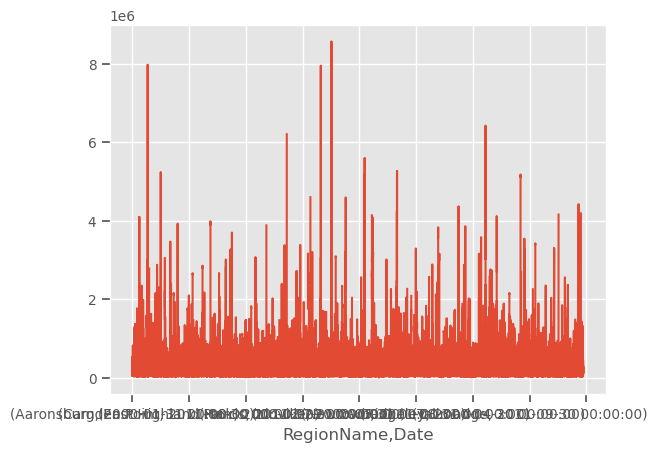

In [14]:
month_ts.plot()

In [15]:
city_unstacked = month_ts.unstack(0)
city_unstacked

RegionName,Aaronsburg,Abbeville,Abbot,Abbotsford,Abbott,Abbottstown,Abbyville,Abell,Aberdeen,Abernathy,...,Zionville,Zirconia,Zoar,Zolfo Springs,Zuehl,Zumbro Falls,Zumbrota,Zuni,Zwingle,Zwolle
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,NaN,"67,757.00",NaN,NaN,NaN,"137,993.00",NaN,"124,039.00","135,778.00","59,920.00",...,"86,661.00",NaN,NaN,"58,131.00",NaN,NaN,NaN,"109,364.00",NaN,"135,941.00"
2000-02-29,NaN,"68,016.00",NaN,NaN,NaN,"138,324.00",NaN,"125,590.00","136,056.00","58,802.00",...,"87,693.00",NaN,NaN,"58,179.00",NaN,NaN,NaN,"109,206.00",NaN,"138,833.00"
2000-03-31,NaN,"67,907.00",NaN,NaN,NaN,"137,854.00",NaN,"126,042.00","136,417.00","58,970.00",...,"87,677.00",NaN,NaN,"58,062.00",NaN,NaN,NaN,"109,319.00",NaN,"138,791.00"
2000-04-30,NaN,"67,687.00",NaN,NaN,NaN,"137,831.00",NaN,"126,843.00","137,136.00","59,446.00",...,"87,800.00",NaN,NaN,"57,939.00",NaN,NaN,NaN,"109,571.00",NaN,"139,684.00"
2000-05-31,NaN,"67,417.00",NaN,NaN,NaN,"137,763.00",NaN,"126,394.00","138,008.00","60,428.00",...,"87,432.00",NaN,NaN,"57,847.00",NaN,NaN,NaN,"110,542.00",NaN,"137,725.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,"216,545.00","156,738.00","174,211.00","158,642.00","203,570.00","274,673.00","153,263.00","426,728.00","143,846.00","140,754.00",...,"324,001.00","472,712.00","224,119.00","180,525.00","446,643.00","424,724.00","311,017.00","301,784.00","266,234.00","139,490.00"
2022-06-30,"220,519.00","158,575.00","177,605.00","159,636.00","207,188.00","275,996.00","156,135.00","423,465.00","144,985.00","143,312.00",...,"328,929.00","484,565.00","228,031.00","183,948.00","441,958.00","429,607.00","315,050.00","305,269.00","269,325.00","140,633.00"
2022-07-31,"224,539.00","158,929.00","180,666.00","160,849.00","210,737.00","277,503.00","158,725.00","419,833.00","146,371.00","145,464.00",...,"329,479.00","491,429.00","231,598.00","187,221.00","434,930.00","434,623.00","315,521.00","308,491.00","273,192.00","142,156.00"


KeyboardInterrupt: 

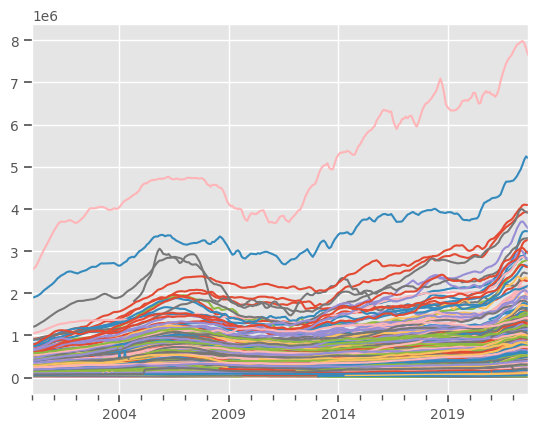

In [16]:
city_unstacked.plot()

# Selecting our TS for resampling demonstration

1. 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex. 

In [18]:
ts = city_unstacked.resample('A').sum()

In [19]:
ts.index

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31', '2021-12-31', '2022-12-31'],
              dtype='datetime64[ns]', name='Date', freq='A-DEC')

KeyboardInterrupt: 

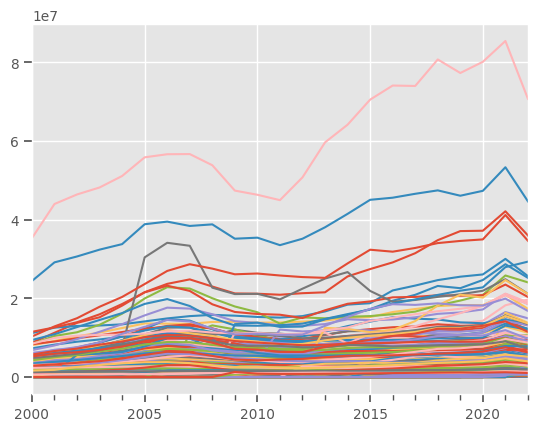

In [20]:
ts.plot()

2) How much did the home values change from November 2008 to December 2008 (in dollars)?
Hint: you can use .diff() to calculate the change in values

In [ ]:
ts2 = city_unstacked.resample('A').diff()

In [ ]:
ts.index()

In [ ]:
ts2.plot()